In [1]:
import numpy as np
import pandas as pd
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
from scipy import interpolate
from netCDF4 import Dataset

import pandas as pd
from mpl_toolkits.basemap import Basemap
from global_land_mask import globe

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [87]:
f = Dataset('hujan_RFresult.nc','r')

In [88]:
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: Hujan_model

In [89]:
f.groups['Hujan_model']['Latitude'][:]

masked_array(data=[-7.2 , -7.15, -7.1 , -7.05, -7.  , -6.95, -6.9 , -6.85,
                   -6.8 , -6.75],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [90]:
hujan = f.groups['Hujan_model']

In [91]:
print ("meta data for hujan group:")
print(hujan)

meta data for hujan group:
<class 'netCDF4._netCDF4.Group'>
group /Hujan_model:
    dimensions(sizes): lat(10), lon(14)
    variables(dimensions): float32 Latitude(lat), float32 Longitude(lon), float32 hujan(lat,lon)
    groups: 



# Plotting 

In [92]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import wradlib as wrl
import numpy as np
from osgeo import osr
import h5py

In [93]:
# # %matplotlib inline
# # hujan.variables['hujan'][:]
# ujang = f['hujan'][:,:].copy()
# lat = f['Latitude'][:].copy()
# lon = f['Longitude'][:].copy()

In [94]:
# %matplotlib inline
# hujan.variables['hujan'][:]
ujang = hujan.variables['hujan'][:,:].copy()
lat = hujan.variables['Latitude'][:].copy()
lon = hujan.variables['Longitude'][:].copy()

In [95]:
x = lon.copy()
y = lat.copy()

In [96]:
xx, yy = np.meshgrid(x, y)

In [97]:
#domain 
south, north = -7.1, -6.75
west, east =  107.42, 107.9

In [98]:
m = Basemap(llcrnrlon=107.42,llcrnrlat=-7.1, urcrnrlon=107.9, urcrnrlat=-6.75, projection='cyl',resolution='f')

In [99]:
import matplotlib
cmap = matplotlib.colors.ListedColormap(
    ['darkblue','dodgerblue','paleturquoise','green','greenyellow','yellow',
     'gold','darkorange','red','darkred'])

clevs = [0,5,10,15,20,25,30,35,40,45,50]

In [100]:
ujang

masked_array(
  data=[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
          0.],
        [ 0.,  0.,  0.,  0.,  0., 10., 13.,  4.,  0.,  9., 17., 10.,  0.,
          3.],
        [ 0.,  0.,  0.,  6.,  6., 11.,  7.,  4.,  0.,  8.,  8., 12.,  0.,
          0.],
        [ 0., 11.,  8.,  8., 13.,  0.,  8.,  0., 19., 10.,  8.,  0.,  0.,
          0.],
        [ 0.,  0.,  8.,  7.,  0., 17., 16.,  6., 10.,  9.,  0.,  6.,  0.,
          0.],
        [ 0.,  0., 13., 11.,  6., 10.,  0., 37.,  6.,  9.,  0.,  0.,  0.,
          0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

http://server.arcgisonline.com/ArcGIS/rest/services/Elevation/World_Hillshade/MapServer/export?bbox=107.42,-7.1,107.9,-6.75&bboxSR=4326&imageSR=4326&size=700,510&dpi=900&format=png32&transparent=true&f=image
yes


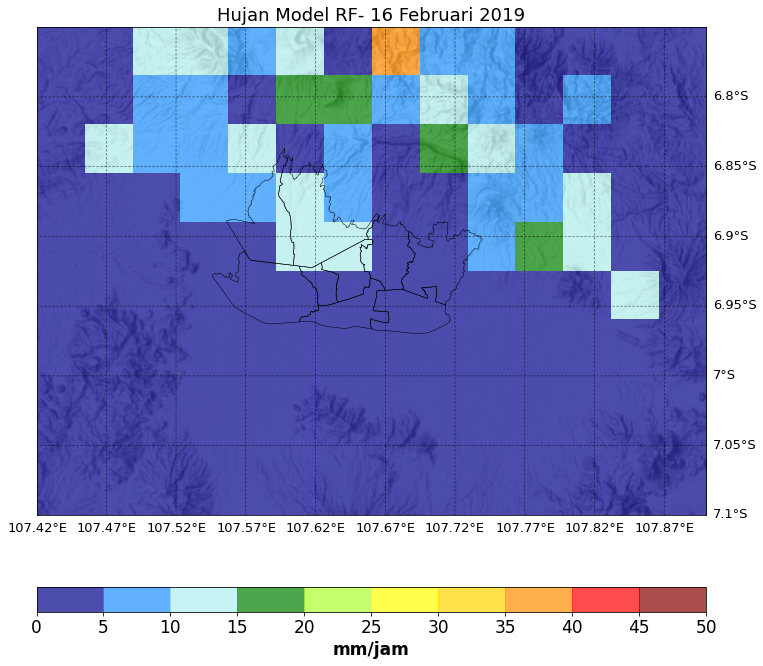

In [101]:
plt.figure(figsize=(12,12))
#xx, yy = meshgrid(x2, y2)
# m.arcgisimage(server="http://server.arcgisonline.com/ArcGIS", service="Elevation/World_Hillshade", xpixels=700, ypixels=None, dpi=400, verbose=True)
m.arcgisimage(server="http://server.arcgisonline.com/ArcGIS", service="Elevation/World_Hillshade", xpixels=700, ypixels=None, dpi=900, verbose=True)
m.drawparallels(np.arange(-7.1, -6.75, 0.05), labels=[0, 1, 1, 0], linewidth=0.5, dashes=[4, 4],fontsize=13) #latitude
m.drawmeridians(np.arange(107.42, 107.9, 0.05),labels=[1, 0, 0, 1], linewidth=0.5,dashes=[4, 4], fontsize=13) #longitude
m.drawcoastlines()
cs=m.imshow(ujang, cmap=cmap, alpha=0.7, vmin=0, vmax=50)
# matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, 
#                           extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)[source]¶
m.readshapefile("/home/ajiwiranto/Documents/kodingan/scriptplot/BandungPWK/BandungPWK/BandungPWK",'BandungPWK.shp')
cb=m.colorbar(cs,location='bottom', pad=1, ticks=clevs)
# fig.colorbar(cb.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cb.set_label(label='mm/jam',weight='bold', size=17)
cb.ax.tick_params(labelsize=17.0)
plt.title('Hujan Model RF- 16 Februari 2019', fontsize=18)
# plt.savefig('Hujan Model RF-16 Februari 2019-5km_pergrid_2.png')

print("yes")
plt.show()

# Hasil Data GPM

In [25]:
#data GPM
fname = sorted(glob.glob('/home/ajiwiranto/Documents/kodingan/TA/df_hmwr-gpm/random_forest/python/implementation/gpm/*.h5'))
m1= h5py.File(fname[0], mode='r+')
lon1 = m1['NS']['Longitude'][:,:] 
lat1 = m1['NS']['Latitude'][:,:]
data1 =m1['NS']['SLV']['precipRateNearSurface'][:]
fname[0]
#fname65

'/home/ajiwiranto/Documents/kodingan/TA/df_hmwr-gpm/random_forest/python/implementation/gpm/GPMCOR_KUR_1902160708_0840_028230_L2S_DU2_06A.h5'

In [26]:
mG = Basemap(llcrnrlon=107.42,llcrnrlat=-7.1, urcrnrlon=107.9, urcrnrlat=-6.75, projection='cyl',resolution='f')

In [35]:
#domain 
south1, north1 = -7.5, -6.0
west1, east1 =  106.9, 108.5

In [36]:
mask_area_see =(lat1<south1) + (lat1>north1)+ (lon1<west1) + (lon1>east1)
mvar_see=np.ma.array(data1,mask=mask_area_see)

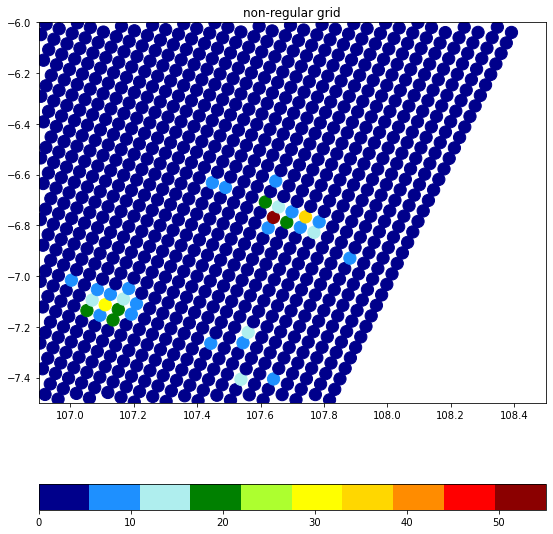

In [37]:
#liat swath
plt.figure(figsize=(20,10))
ax =plt.subplot(122)
cf=ax.scatter(lon1.reshape(-1),lat1.reshape(-1),150,mvar_see.reshape(-1),cmap=cmap)
ax.set_xlim(west1,east1)
ax.set_ylim(south1,north1)
plt.title('non-regular grid')
plt.colorbar(cf,orientation="horizontal")

In [38]:
#cekungan Bandung

In [39]:
#domain 
south, north = -7.2, -6.7
west, east =  107.32, 107.95

In [40]:
mask_area =(lat1<south) + (lat1>north)+ (lon1<west) + (lon1>east)
mvar=np.ma.array(data1,mask=mask_area)

In [44]:
import matplotlib

cmap = matplotlib.colors.ListedColormap(
    ['darkblue','dodgerblue','paleturquoise','green','greenyellow','yellow',
     'gold','darkorange','red','darkred'])

clevs = [0,5,10,15,20,25,30,35,40,45,50]

http://server.arcgisonline.com/ArcGIS/rest/services/Elevation/World_Hillshade/MapServer/export?bbox=107.42,-7.1,107.9,-6.75&bboxSR=4326&imageSR=4326&size=700,510&dpi=700&format=png32&transparent=true&f=image


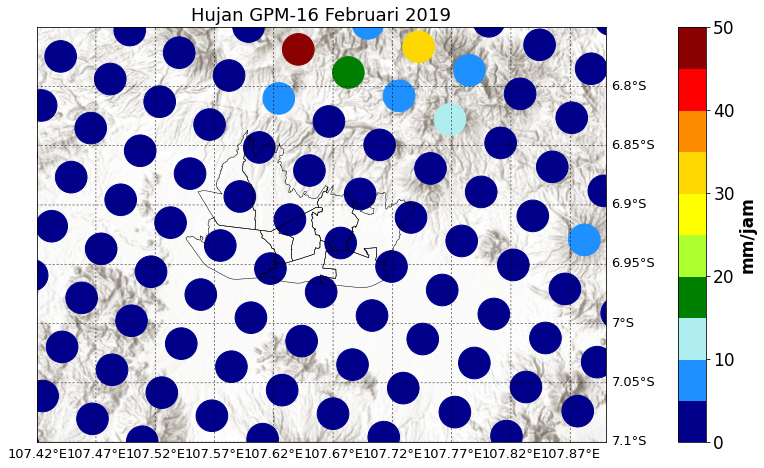

In [45]:
plt.figure(figsize=(12,14))
#xx, yy = meshgrid(x2, y2)
mG.arcgisimage(server="http://server.arcgisonline.com/ArcGIS", service="Elevation/World_Hillshade", xpixels=700, ypixels=None, dpi=700, verbose=True)

mG.drawparallels(np.arange(-7.1, -6.75, 0.05), labels=[0, 1, 1, 0], linewidth=0.5, dashes=[4, 4],fontsize=13) #latitude
mG.drawmeridians(np.arange(107.42, 107.9, 0.05), labels=[1, 0, 0, 1], linewidth=0.5,dashes=[4, 4], fontsize=13) #longitude
mG.drawcoastlines()
# cs=mG.imshow(zG, cmap= cmap,alpha=0.5)
# cs =m.p(lon1, lat1, data1, latlon=True, cmap=cmap,levels= clevs, extend='max',alpha=0.5)
mG.readshapefile("/home/ajiwiranto/Documents/kodingan/scriptplot/BandungPWK/BandungPWK/BandungPWK",'BandungPWK.shp')
cf=mG.scatter(lon1.reshape(-1),lat1.reshape(-1),1000,mvar.reshape(-1),cmap=cmap, vmin=0, vmax=50)
# cs=m.imshow(data1, cmap=cmap, alpha=0.5, vmin=0, vmax=50)
# cs=m1.contourf(grid_x, grid_y, zG, cmap=cmap, levels= np.arange(0,45,1), extend='both', alpha=0.6)
# cs =m.contourf(x2, y2,ujang, latlon=True, extend='max',cmap=cmap,alpha=0.9,norm=norm)
# m1.readshapefile("/home/ajiwiranto/Documents/kodingan/scriptplot/BandungPWK/BandungPWK/BandungPWK",'BandungPWK.shp')
# m.scatter(x2, y2, marker = 'o', color='gainsboro', zorder=15, s=75, linewidth=1, edgecolor='k')

cb=mG.colorbar(cf,ticks=None, pad= 1, location='right')
cb.set_label(label='mm/jam',weight='bold', size=17)
cb.ax.tick_params(labelsize=17.0)
plt.title('Hujan GPM-16 Februari 2019', fontsize=18)  

plt.savefig('hujan_GPM- 16 Februari 2019_pergranule')
plt.show()

http://server.arcgisonline.com/ArcGIS/rest/services/Elevation/World_Hillshade/MapServer/export?bbox=107.42,-7.1,107.9,-6.75&bboxSR=4326&imageSR=4326&size=700,510&dpi=700&format=png32&transparent=true&f=image


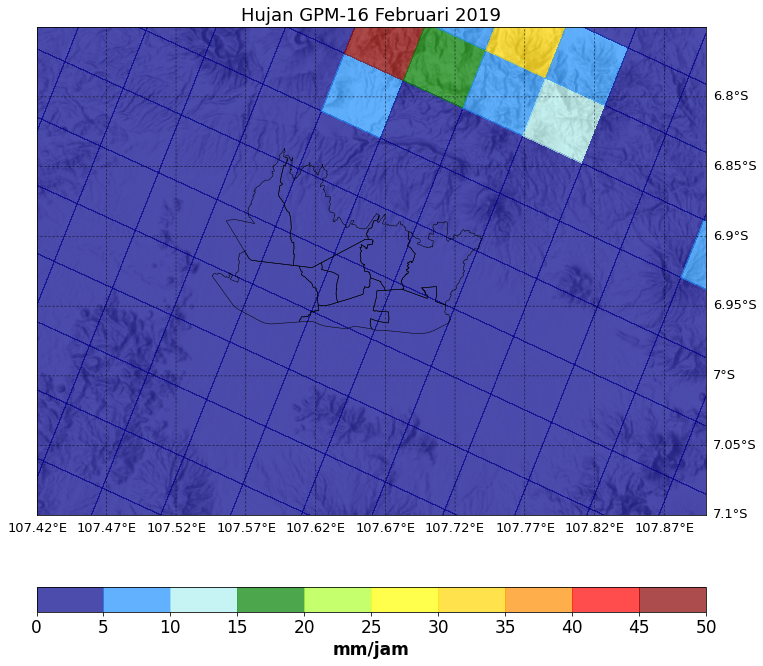

In [46]:
plt.figure(figsize=(12,14))
#xx, yy = meshgrid(x2, y2)
mG.arcgisimage(server="http://server.arcgisonline.com/ArcGIS", service="Elevation/World_Hillshade", xpixels=700, ypixels=None, dpi=700, verbose=True)

mG.drawparallels(np.arange(-7.1, -6.75, 0.05), labels=[0, 1, 1, 0], linewidth=0.5, dashes=[4, 4],fontsize=13) #latitude
mG.drawmeridians(np.arange(107.42, 107.9, 0.05), labels=[1, 0, 0, 1], linewidth=0.5,dashes=[4, 4], fontsize=13) #longitude
mG.drawcoastlines()
# cs=mG.imshow(data1, cmap= cmap,alpha=0.7)
# cs =m.p(lon1, lat1, data1, latlon=True, cmap=cmap,levels= clevs, extend='max',alpha=0.5)
mG.readshapefile("/home/ajiwiranto/Documents/kodingan/scriptplot/BandungPWK/BandungPWK/BandungPWK",'BandungPWK.shp')
# cf=m.scatter(lon1.reshape(-1),lat1.reshape(-1),150,mvar.reshape(-1),cmap=cmap, vmin=0, vmax=50)
cs=mG.pcolormesh(lon1,lat1, data1, cmap=cmap, alpha=0.7, vmin=0, vmax=50)
# cs=m1.contourf(grid_x, grid_y, zG, cmap=cmap, levels= np.arange(0,45,1), extend='both', alpha=0.6)
# cs =m.contourf(x2, y2,ujang, latlon=True, extend='max',cmap=cmap,alpha=0.9,norm=norm)
# m1.readshapefile("/home/ajiwiranto/Documents/kodingan/scriptplot/BandungPWK/BandungPWK/BandungPWK",'BandungPWK.shp')
# m.scatter(x2, y2, marker = 'o', color='gainsboro', zorder=15, s=75, linewidth=1, edgecolor='k')

cb=mG.colorbar(cs,ticks=clevs, pad= 1, location='bottom')
cb.set_label(label='mm/jam',weight='bold', size=17)
cb.ax.tick_params(labelsize=17.0)
plt.title('Hujan GPM-16 Februari 2019', fontsize=18)  

plt.savefig('hujan_GPM- 16 Februari 2019_pergranule_grid')
plt.show()

# GSMaP

In [48]:
#domain 
south, north = -7.12, -6.75
west, east =  107.42, 107.9

In [49]:
gsmap = Dataset('/home/ajiwiranto/Documents/kodingan/TA/df_hmwr-gpm/random_forest/python/implementation/data/gsmap/feby16.nc')
gsmap

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): lon(9), lat(6)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float64 pr(lat,lon)
    groups: 

In [55]:
lonG= gsmap['lon'][:].copy()
latG =gsmap['lat'][:].copy()
rainG = gsmap['pr'][:,:].copy()
xG,yG = np.meshgrid(lonG,latG)

In [56]:
m2 = Basemap(llcrnrlon=107.42,llcrnrlat=-7.12, urcrnrlon=107.9, urcrnrlat=-6.75, projection='cyl',resolution='f')

In [57]:
rainG

masked_array(
  data=[[0.80702543, 0.        , 0.        , 0.        , 0.        ,
         0.10429212, 0.        , 0.        , 0.        ],
        [0.54157096, 0.        , 0.        , 0.        , 0.11994838,
         0.19245628, 0.0947005 , 0.17300923, 0.17733201],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.08224711, 0.30112523, 0.22784901],
        [0.        , 0.        , 0.        , 0.09655779, 0.07984656,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.16191097, 0.08965956,
         0.        , 0.        , 0.        , 0.        ],
        [0.50461543, 0.72050512, 0.4958657 , 0.12141997, 0.07708394,
         0.        , 0.        , 0.        , 0.        ]],
  mask=False,
  fill_value=1e+20)

http://server.arcgisonline.com/ArcGIS/rest/services/Elevation/World_Hillshade/MapServer/export?bbox=107.42,-7.1,107.9,-6.75&bboxSR=4326&imageSR=4326&size=700,510&dpi=400&format=png32&transparent=true&f=image


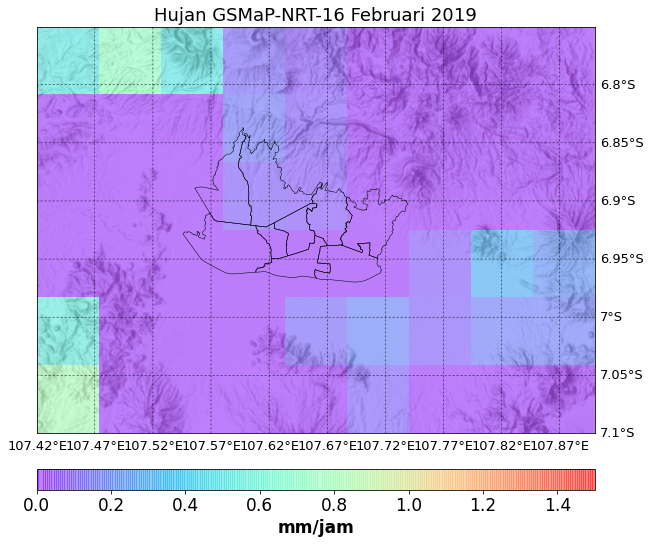

In [30]:
plt.figure(figsize=(10,13))
#xx, yy = meshgrid(x2, y2)
m2.arcgisimage(server="http://server.arcgisonline.com/ArcGIS", service="Elevation/World_Hillshade", xpixels=700, ypixels=None, dpi=400, verbose=True)
# m.arcgisimage(server="http://server.arcgisonline.com/ArcGIS", service="Elevation/World_Hillshade", xpixels=700, ypixels=None, dpi=400, verbose=True)
m2.drawparallels(np.arange(-7.1, -6.75, 0.05), labels=[0, 1, 1, 0], linewidth=0.5, dashes=[4, 4],fontsize=13) #latitude
m2.drawmeridians(np.arange(107.42, 107.9, 0.05), labels=[1, 0, 0, 1], linewidth=0.5,dashes=[4, 4], fontsize=13) #longitude
m2.drawcoastlines()
cs=m2.imshow(rainG, cmap='rainbow', alpha=0.5, vmin=0, vmax=1.5)
m2.readshapefile("/home/ajiwiranto/Documents/kodingan/scriptplot/BandungPWK/BandungPWK/BandungPWK",'BandungPWK.shp')
cb=m2.colorbar(cs, pad= 0.5, location='bottom')
cb.set_label(label='mm/jam',weight='bold', size=17)
cb.ax.tick_params(labelsize=17.0)
plt.title('Hujan GSMaP-NRT-16 Februari 2019', fontsize=18)  

# plt.savefig('hujan_GSMaP-NRT 16 Februari 2019_pergrid')
plt.show()